---
# S&P 500 Stock Analysis: Is Technology the Right Investment for the Future?

---
# Introduction

The S&P 500 stock market index, maintained by S&P Dow Jones Indices, comprises 505 common stocks issued by 500 large-cap companies and traded on American exchanges, and covers about 80 percent of the American equity marekt by capitalization, i.e. S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States. It is one of the most commonly followed equity indices, and many consider it to be one of the best representations of the U.S. stock market. The S&P 500 component stocks cover eleven (11) market sectors and a total of 128 sub industries. 

The objective of this project is to perform the U.S equity market/stocks analysis through the new technology: data science concepts, knowledge, and tools. The data analysis and calculation are based on Python software with modules: NumPy & Pandas, and matplotlib & seaborn libraries.

This project consists of 6 parts.

**feel free to modify**

* Part 1 - S&P 500 stocks historical data collection and cleaning
* Part 2 - Descriptive statistic analysis for S&P 500 stocks
* Part 3 - Data analysis under stock/industry level
* Part 4 - Coronavirus effect on S&P 500 stock prices
* Part 5 - Stock price forecasting and prediction
* Part 6 - Conclusion

Each part is provided in a separate file. It is recommended to follow the order of the files.

---
# Part 1: S&P 500 Stocks Historical Data Collection and Cleaning

#### Task 1:

Import raw data;

Identify missing values, anomalies and outliers (Data cleaning);

Merge datasets and resolve mismatches;

---

In [1]:
# Import and merge datasets

import pandas as pd

sp500 = pd.read_csv("https://raw.githubusercontent.com/ProjectTeam4/ProjectTeam4.github.io/master/stock%20data.csv")
stockReference = pd.read_csv("https://raw.githubusercontent.com/ProjectTeam4/ProjectTeam4.github.io/master/companies.csv")

fullDataset = pd.merge(sp500, stockReference, how="left", left_on='Name', right_on='ticker')
fullDataset = fullDataset[['date', 'close', 'Name', 'ticker', 'company name', 'sector']]
fullDataset.head()

,date,close,Name,ticker,company name,sector
0,08-02-2013,14.75,AAL,AAL,American Airlines Group Inc.,Industrials
1,11-02-2013,14.46,AAL,AAL,American Airlines Group Inc.,Industrials
2,12-02-2013,14.27,AAL,AAL,American Airlines Group Inc.,Industrials
3,13-02-2013,14.66,AAL,AAL,American Airlines Group Inc.,Industrials
4,14-02-2013,13.99,AAL,AAL,American Airlines Group Inc.,Industrials


In [2]:
# Identify Mismatches
# Noticed that 21 stocks could not match to available reference information

unmatchedData = fullDataset[fullDataset["ticker"].isnull()]
print(unmatchedData.Name.unique())
print(unmatchedData.date.unique())

['AET' 'ANDV' 'CA' 'CBG' 'COL' 'CSRA' 'DPS' 'ESRX' 'EVHC' 'GGP' 'HCN'
 'KORS' 'LUK' 'MON' 'PCLN' 'PX' 'SCG' 'SNI' 'TWX' 'WYN' 'XL']
['08-02-2013' '11-02-2013' '12-02-2013' ... '05-02-2018' '06-02-2018'
 '07-02-2018']


In [3]:
# Resolve mismatch issue
# Manually looked up "Names" and appended to stock reference file

stockReference_v2 = pd.read_csv("https://raw.githubusercontent.com/ProjectTeam4/ProjectTeam4.github.io/master/companies_updated.csv")

fullDataset_v2 = pd.merge(sp500, stockReference_v2, how="left", left_on='Name', right_on='ticker')
fullDataset_v2 = fullDataset_v2[['date', 'close', 'Name', 'ticker', 'company name', 'sector']]

unmatchedData_v2 = fullDataset_v2[fullDataset_v2["ticker"].isnull()]
print(unmatchedData_v2.Name.unique())
print(unmatchedData_v2.date.unique())

[]
[]


In [4]:
# Identify Inconsistencies
# Noticed that the list of stocks were captured based on date of data pull and does not populate historical information for
# stocks that fell out of SP500 between the start date to last date

countByDate = fullDataset_v2.groupby('date').count()
countByDate.sort_values(by=['sector'], ascending=True)

,close,Name,ticker,company name,sector
date,,,,,
26-04-2013,472,472,472,472,472
22-04-2013,476,476,476,476,476
02-05-2013,476,476,476,476,476
15-04-2013,476,476,476,476,476
04-03-2013,476,476,476,476,476
...,...,...,...,...,...
11-01-2018,505,505,505,505,505
29-01-2018,505,505,505,505,505
05-12-2017,505,505,505,505,505


In [11]:
# Resolve inconsistency issue


In [5]:
# Compile final dataset for analysis

cleanDataset = fullDataset_v2[['date', 'close', 'ticker', 'company name', 'sector']]
cleanDataset.head()

,date,close,ticker,company name,sector
0,08-02-2013,14.75,AAL,American Airlines Group Inc.,Industrials
1,11-02-2013,14.46,AAL,American Airlines Group Inc.,Industrials
2,12-02-2013,14.27,AAL,American Airlines Group Inc.,Industrials
3,13-02-2013,14.66,AAL,American Airlines Group Inc.,Industrials
4,14-02-2013,13.99,AAL,American Airlines Group Inc.,Industrials


#### Conclusion:

We found issues with data we have gathered. We filled in the gaps where we can and left data as is for things we cannot change 
with current resources


---
# Part 2 - Descriptive Statistic Analysis for S&P 500 Stocks

#### Task 2:

Perform descriptive analysis;

first question: how has the composition of stocks by industry changed over time?

Calculate and graph stock composition by industry over time;

### To be Filled:

* **Comments:**

* **Codes:**

* **Conclusion:**

In [408]:
# grouping data by industry
fullDataset_grouped = fullDataset.groupby('industry')

---
# Part 3 - Data Analysis under Stock/Industry Level

#### Task 3: 

Second question: What are the daily and monthly price changes at individual stock and industry level? (Sector Level) 

Calculate daily and monthly price changes by industry and determine distribution of standard deviation

#### Task 4: 

Third question:If we are to select a stock by industry at random, what are the chances that it has positive return?

Calculate percentage of stocks with positive return by industry over time.

Which industry should we invest in for the most return? 

If we pick the top 5 expensive stock in this industry, what is the monthly return over the period for these 5 stocks? 

Is there any Seasonality for the monthend close price? 

Is there autocorrelation of the monthend close prices of each of the 5 stocks? 

Visualize the correlation between the returns of all pairs of stocks.

#### Task 5:

Fourth question: Is there a linear correlation between volatility of prices to overall return?

Calculate correlation of stock returns to price volatility by industry over time.

#### Task 6:

Fifth question:Is there a correlation between days of loss until a day of positive return?

Calculate days of loss until positive return and chi square of dataset to determine if they are dependent

#### Task 8: 

Seventh question: Is there seasonality in the data? (sector level does Sector perform welll during certain period)

Find seasonality effect using lag plot or autocorrelation functions.


### To be Filled:

* **Comments:**

* **Codes:**

* **Conclusion:**

In [161]:
# Task 8: Seasonality Analysis 

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import statsmodels.api
import statsmodels as sm
import scipy.stats as ss
from pandas.plotting import autocorrelation_plot
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller



In [85]:
# Check Total Ticker/Company Unique Number:
len(cleanDataset.ticker.unique())


505

In [62]:
# List Ticker/Company Name
TickerList = cleanDataset.ticker.unique()
#TickerList


In [63]:
# Check Sector Unique Number:
len(cleanDataset.sector.unique())


11

In [64]:
# List Sector Name
SectorName = cleanDataset.sector.unique()
#SectorName


In [65]:
# Create DataFrame for Ticker vs Sector
TickerSector = pd.pivot_table(cleanDataset, index=['ticker','sector'])
#TickerSector
#TickerSector.head()


In [66]:
###############################
# Stock Price & Return (Daily)

# Reshape Historical Close for Ticker with Pivot Function
HistData = cleanDataset.pivot(index='date', columns='ticker', values='close')
#HistData.head()


In [67]:
# Display Historical Data DataFrame Information
HistData.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 01-02-2016 to 31-12-2015
Columns: 505 entries, A to ZTS
dtypes: float64(505)
memory usage: 4.9+ MB


In [68]:
# Review Historical Stock Price Index/Date 
HistData.index


Index(['01-02-2016', '01-02-2017', '01-02-2018', '01-03-2013', '01-03-2016',
       '01-03-2017', '01-04-2013', '01-04-2014', '01-04-2015', '01-04-2016',
       ...
       '31-08-2015', '31-08-2016', '31-08-2017', '31-10-2013', '31-10-2014',
       '31-10-2016', '31-10-2017', '31-12-2013', '31-12-2014', '31-12-2015'],
      dtype='object', name='date', length=1259)

In [70]:
# Sort HistData DataFrame Date
HistData.index = pd.to_datetime(HistData.index)
HistData.sort_index(inplace=True)
#HistData.head()


In [71]:
# Review Historical Stock Price Index/Date 
HistData.index


DatetimeIndex(['2013-01-03', '2013-01-04', '2013-01-05', '2013-01-07',
               '2013-01-08', '2013-01-10', '2013-01-11', '2013-02-04',
               '2013-02-05', '2013-02-07',
               ...
               '2018-04-01', '2018-05-01', '2018-05-02', '2018-06-02',
               '2018-07-02', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='date', length=1259, freq=None)

In [72]:
# Calculate Daily Return
DailyReturn = HistData.pct_change()
#DailyReturn.head()


In [73]:
# Check Potential NaN at Each Column
DailyReturn.isnull().sum().unique()


array([   1,   13, 1069,  987,  231,    4,  485,  988,  985,  759,  735,
        227,  983,  229,  483,  228,  479,  230,  734,  731,  482],
      dtype=int64)

In [74]:
#############################
# Stock Return (Monthly)

# Generate Month End Historical Stock Price
HistData_MonthEnd = HistData.resample('BM').last()
#HistData_MonthEnd.head()


In [75]:
# Calculate Monthly Return
MonthlyReturn = HistData_MonthEnd.pct_change()
#MonthlyReturn.head()


In [76]:
# Check Potential NaN at Each Column
MonthlyReturn.isnull().sum().unique()


array([ 1,  2, 53, 49, 13, 25, 38, 37], dtype=int64)

In [77]:
#############################
# Sector Return (Daily)

# Create Sector Dictionary
SectorDict = {}
for name in SectorName:
    tickers =[]
    for pos in range(len(TickerSector.index)):
        if TickerSector.index[pos][1] == name:
            tickers.append(TickerSector.index[pos][0])
    SectorDict[name] = tickers
#SectorDict


In [78]:
# Create Daily Sector Return
DailySectorReturn = pd.DataFrame(index=DailyReturn.index)
for name in SectorName:
    DailySectorReturn[name] = pd.DataFrame(DailyReturn[SectorDict[name]]).mean(axis=1, skipna=True)

DailySectorReturn = DailySectorReturn.dropna()
#DailySectorReturn

In [79]:
#############################
# Sector Return (Monthly)

# Create Monthly Sector Return
MonthlySectorReturn = pd.DataFrame(index=MonthlyReturn.index)
for name in SectorName:
    MonthlySectorReturn[name] = pd.DataFrame(MonthlyReturn[SectorDict[name]]).mean(axis=1, skipna=True)

MonthlySectorReturn = MonthlySectorReturn.dropna()
#MonthlySectorReturn


In [80]:
#############################
# S&P 500 Return (Daily)

# Create Daily S&P 500 Return
DailySP500Return = pd.DataFrame(index=DailyReturn.index)
DailySP500Return = pd.DataFrame(DailyReturn).mean(axis=1, skipna=True)

DailySP500Return = DailySP500Return.dropna()
#DailySP500Return


date
2013-01-04    0.033101
2013-01-05    0.015351
2013-01-07    0.026664
2013-01-08    0.066736
2013-01-10    0.007483
                ...   
2018-08-01    0.037617
2018-09-01   -0.000358
2018-10-01   -0.002595
2018-11-01    0.009095
2018-12-01    0.006160
Length: 1258, dtype: float64

In [83]:
#############################
# S&P 500 Return (Monthly)

# Creat Monthly S&P 500 Return
DailySP500Return_MonthEnd = DailySP500Return.resample('BM').last()
#DailySP500Return_MonthEnd.head()


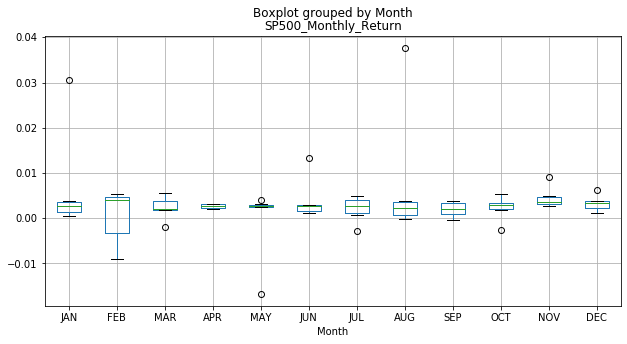

In [118]:
########################################
# 1. S&P 500 Seasonality Analysis:

# Boxplot Grouped by Month for SP500
Monthly_Returns_SP500 = DailySP500Return.groupby([DailySP500Return.index.year.rename('year'), 
                                               DailySP500Return.index.month.rename('month')]).mean()
rcParams['figure.figsize'] = 10,5
Monthly_Returns_List = []
for i in range(len(Monthly_Returns_SP500)):
    Monthly_Returns_List.append({'Year':Monthly_Returns_SP500.index[i][0],'Month':Monthly_Returns_SP500.index[i][1],
                                 'SP500_Monthly_Return': Monthly_Returns_SP500[i]})
Monthly_Returns_List = pd.DataFrame(Monthly_Returns_List, columns=('Year','Month','SP500_Monthly_Return'))
Monthly_Returns_List.boxplot(column='SP500_Monthly_Return', by='Month')
ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
ax.set_xticklabels(labels)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


#### Observations/Comments:

* Overall S&P 500 market return trend exhibits a wave like pattern: market returns seem to increase from January to February followed by decrease in average returns in March to June. August to December exhibits steady increase in market returns.
* Highest range of return (high to low range of box plot) in the past 6 years occured in February, July, August, and September.
* March & October demonstrate low donwside trade probability as low part of the box plot is closely situated outside the first quantile of the data. Therefore, it might provide good opportunity for investor to get in market or add to their investments. However, proper backtesting is needed to prove this hypothesis.
* January & December demonstrate low upside trade probability as upper part of the box plot is closely situated outside the third quantile of the data. Therefore, it might provide good opportunity for investor to get off market or sell their investments. However, proper backtesting is needed to prove this hypothesis.
* Months of April and May provide the smallest quarterfinal range (IQR). Coincidentally, the aforementioned months are half year and end of the trading year.

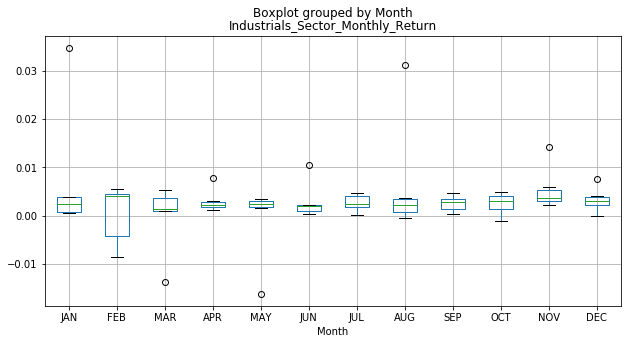

In [125]:
########################################
# 2. Sector Seasonality Analysis:

# 2.1. Boxplot Grouped by Month for Industrials Sector
Monthly_Returns = DailySectorReturn['Industrials'].groupby([DailySectorReturn.index.year.rename('year'), 
                                               DailySectorReturn.index.month.rename('month')]).mean()
rcParams['figure.figsize'] = 10,5
Monthly_Returns_List = []
for i in range(len(Monthly_Returns)):
    Monthly_Returns_List.append({'Year':Monthly_Returns.index[i][0],'Month':Monthly_Returns.index[i][1],
                                 'Industrials_Sector_Monthly_Return': Monthly_Returns[i]})
Monthly_Returns_List=pd.DataFrame(Monthly_Returns_List, columns=('Year','Month','Industrials_Sector_Monthly_Return'))
Monthly_Returns_List.boxplot(column='Industrials_Sector_Monthly_Return', by='Month')
ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
ax.set_xticklabels(labels)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


#### Observations/Comments:

* Industrials sector return trend exhibits a wave like pattern: market returns seem to increase from January to February followed by decrease in average returns in March to May. June to December exhibits steady increase in market returns.
* Highest range of return (high to low range of box plot) in the past 6 years occured in February.
* March demonstrates low donwside trade probability as low part of the box plot is closely situated outside the first quantile of the data. Therefore, it might provide good opportunity for investor to get in market or add to their investments. However, proper backtesting is needed to prove this hypothesis.
* August & December demonstrate low upside trade probability as upper part of the box plot is closely situated outside the third quantile of the data. Therefore, it might provide good opportunity for investor to get off market or sell their investments. However, proper backtesting is needed to prove this hypothesis.
* Months of April to June provide the smallest quarterfinal range (IQR). Coincidentally, the aforementioned months are half year and end of the trading year.

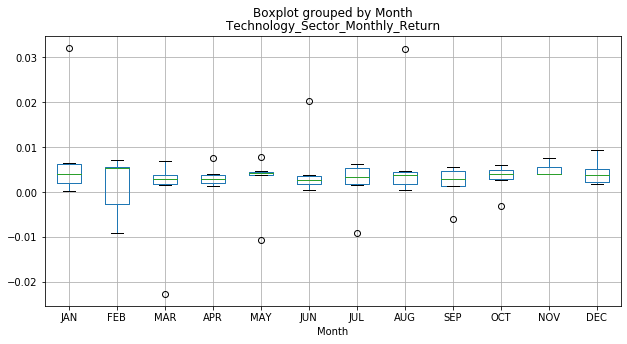

In [124]:
# 2.2. Boxplot Grouped by Month for Technology Sector
Monthly_Returns = DailySectorReturn['Technology'].groupby([DailySectorReturn.index.year.rename('year'), 
                                               DailySectorReturn.index.month.rename('month')]).mean()
rcParams['figure.figsize'] = 10,5
Monthly_Returns_List = []
for i in range(len(Monthly_Returns)):
    Monthly_Returns_List.append({'Year':Monthly_Returns.index[i][0],'Month':Monthly_Returns.index[i][1],
                                 'Technology_Sector_Monthly_Return': Monthly_Returns[i]})
Monthly_Returns_List=pd.DataFrame(Monthly_Returns_List,
                                  columns=('Year','Month','Technology_Sector_Monthly_Return'))
Monthly_Returns_List.boxplot(column='Technology_Sector_Monthly_Return', by='Month')
ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
ax.set_xticklabels(labels)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


#### Observations/Comments:

* Technology sector return trend exhibits a wave like pattern: market returns seem to increase from January to February followed by decrease in average returns in March to May. June to December exhibits steady increase in market returns.
* Highest range of return (high to low range of box plot) in the past 6 years occured in February.
* March, July, September, October, November and December demonstrate low donwside trade probability as low part of the box plot is closely situated outside the first quantile of the data. Therefore, it might provide good opportunity for investor to get in market or add to their investments. However, proper backtesting is needed to prove this hypothesis.
* January, June, & August demonstrate low upside trade probability as upper part of the box plot is closely situated outside the third quantile of the data. Therefore, it might provide good opportunity for investor to get off market or sell their investments. However, proper backtesting is needed to prove this hypothesis.
* Months of April to June and October to November provide the smallest quarterfinal range (IQR). Coincidentally, the aforementioned months are half year and end of the trading year.

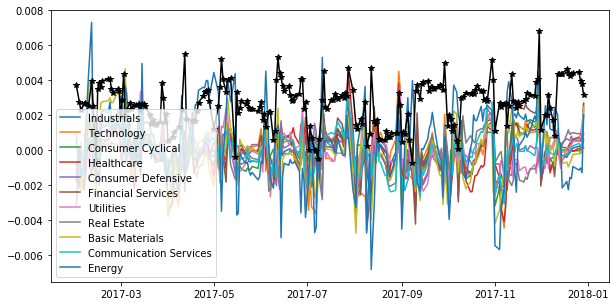

In [182]:
# Sector Seasonality Analysis with S&P 500 Index
df_ = pd.DataFrame(index=AMZN_Seasonality.index, columns=SectorName)

for column in df_:
    Sectors_res = sm.tsa.seasonal.seasonal_decompose(DailySectorReturn[column],model='additive', freq=252)
    Seasonality=Sectors_res.seasonal[Sectors_res.seasonal.index.year == 2017]
    df_[column]=Seasonality

Summary=[]
Legend=SectorName
fig = plt.figure()
ax = fig.add_subplot(111)

for column in df_:
    ax.plot(df_[column].rolling(window=20).mean())
    Summary.append({'Sector': column, 'Min': np.min(df_[column]), 'Max': np.max(df_[column]),
                   'Range':np.max(df_[column])-np.min(df_[column]),'Std':np.std(df_[column]),
                    'Corr to SPY Seasonality': ss.spearmanr(SPY_Seasonality, df_[column])[0] })

SPY_Seasonality = DailySP500Return[DailySP500Return.index.year==2017]
ax.plot(SPY_Seasonality.rolling(window=20).mean(), color='black', linestyle='-',marker='*')
plt.legend(Legend)
plt.show()
Summary=pd.DataFrame(Summary, columns=('Sector','Min','Max','Range','Std','Corr to SPY Seasonality'))


In [183]:
# Correlation for Sectors vs SPY Seasonality
Summary.sort_values('Corr to SPY Seasonality', inplace=True)
Summary


,Sector,Min,Max,Range,Std,Corr to SPY Seasonality
7,Real Estate,-0.087179,0.053858,0.141037,0.017388,0.000101
6,Utilities,-0.061076,0.055887,0.116964,0.018392,0.057515
10,Energy,-0.109973,0.129891,0.239865,0.034444,0.059283
9,Communication Services,-0.071753,0.046135,0.117888,0.016335,0.174682
2,Consumer Cyclical,-0.061482,0.063607,0.125089,0.016067,0.203468
4,Consumer Defensive,-0.050631,0.063425,0.114056,0.014443,0.222199
8,Basic Materials,-0.066425,0.070639,0.137064,0.022012,0.229256
3,Healthcare,-0.074705,0.055754,0.130459,0.019374,0.259365
0,Industrials,-0.058356,0.069420,0.127776,0.017576,0.349098
5,Financial Services,-0.084640,0.075397,0.160037,0.021576,0.355218


#### Observations/Comments:

* Different market sectors seasonality are consistent with those from S&P 500. SPY seasonality in the above picture overlaied with black line.
* Spearman Rank Correlation is used to identify correlation of seasonality of different market sectors to seasonality of S&P 500 market. Sector Consumer Discretionary has highest correlation to S&P 500 market seasonality and sector Real Estate has the least seasonality correlation to market.

#### Observations/Comments:

* Stock AMZN price trend exhibits a wave like pattern: market returns seem to increase in January followed by decrease in average returns in February to March. Then its price exhibits up and down in market returns.
* Highest range of return (high to low range of box plot) in the past 6 years occured in January and October.
* June and July demonstrate low donwside trade probability as low part of the box plot is closely situated outside the first quantile of the data. Therefore, it might provide good opportunity for investor to get in market or add to their investments. However, proper backtesting is needed to prove this hypothesis.
* February and November demonstrate low upside trade probability as upper part of the box plot is closely situated outside the third quantile of the data. Therefore, it might provide good opportunity for investor to get off market or sell their investments. However, proper backtesting is needed to prove this hypothesis.
* Months of June and December provide the smallest quarterfinal range (IQR). Coincidentally, the aforementioned months are half year and end of the trading year.

In [132]:
# Augmented Dickey-Fuller (ADF) Test for stationarity
result = adfuller(HistData['AMZN'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.331485
p-value: 0.998974
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


#### Observations/Comments:
* The null hypothesis states that large p values indicate non-stationarity and smaller p values indicate stationarity. (Using 0.05 as selected alpha value.)
* Augmented Dickey-Fuller (ADF) test revealed the AMZN stock data are non stationary meaning time series is a stochastic process whose unconditional joint probability distribution changes when shifted in time. Since this time series is non staitionary, we attempt to exploit seasonality trends using time series decomposition.

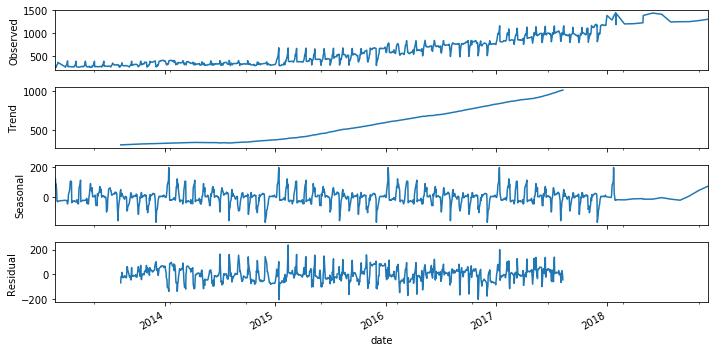

In [172]:
# Seasonality Trends Analysis by Using Time Series Decomposition
AMZNHistData = pd.DataFrame(HistData['AMZN'])
res = sm.tsa.seasonal.seasonal_decompose(AMZNHistData,model='additive', freq=252)
resplot = res.plot()


#### Observations/Comments:
* Stock AMZN price time series $y_t$ comprise three components: a seasonal component, a trend-cycle component (containing both trend and cycle), and a remainder component (containing anything else in the time series). This can be written as: $$y_t=S_t+T_t+E_t$$where $y_t$ is the AMZN stock price at time $t$, $S_t$ is the seasonal component at time $t$, $T_t$ is the trend-cycle component at time $t$ and $E_t$ is the remainder (or irregular or error) component at time $t$.
* Frequency decomposition of 252 meaning that trend is repeated every 252 days (5 trading days and 9 holidays results in 252 trading day).
* Overall trend of the market was increasing. The seasonal trend repeating every year indicate valley and peak.


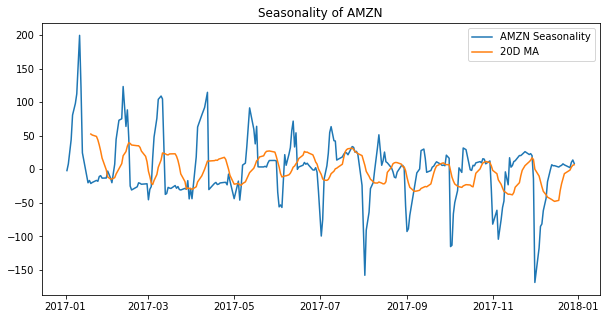

In [173]:
# Seasonality Analysis in Year 2017
AMZN_Seasonality=res.seasonal[res.seasonal.index.year == 2017]
MA1=AMZN_Seasonality.rolling(window=12).mean()
plt.plot(AMZN_Seasonality, label='AMZN Seasonality')
plt.plot(MA1, label='20D MA')
plt.title("Seasonality of AMZN", fontsize=12)
plt.legend()
plt.show()


#### Observations/Comments:
* The seasonal trend repeating every year indicate valley and peak. The seasonality trend is like a wave with major high happening around from January to May and major lows happening around from July to December.
* Market expands from beginning of the year to Spring, then it follows by a period of contraction to mid fall. The seasonality trend reveals change in expectation of market performance during the year.

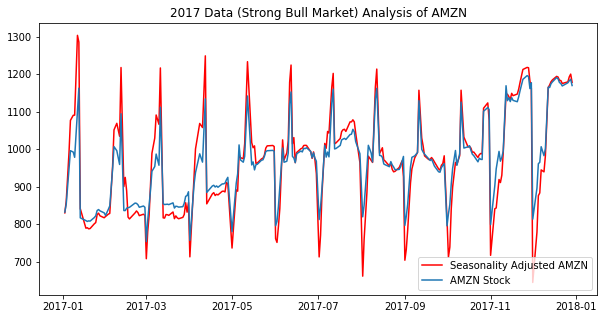

In [174]:
# 2017 Data (Strong Bull Market) Analysis 
plt.plot(AMZNHistData[AMZNHistData.index.year == 2017]+AMZN_Seasonality,color='red',label='Seasonality Adjusted AMZN');
plt.plot(AMZNHistData[AMZNHistData.index.year == 2017],label='AMZN Stock')
plt.title("2017 Data (Strong Bull Market) Analysis of AMZN", fontsize=12)
plt.legend(loc=4)
plt.show()


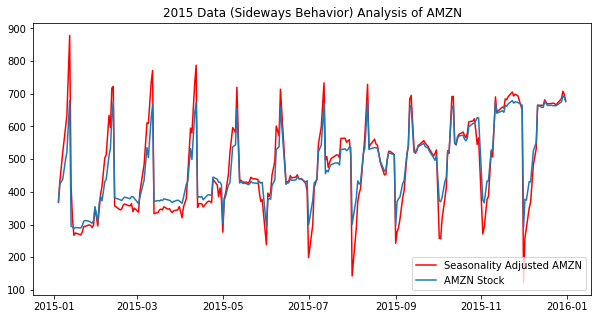

In [175]:
# 2015 Data (Sideways Behavior) Analysis
plt.plot(AMZNHistData[AMZNHistData.index.year == 2015]+res.seasonal[res.seasonal.index.year == 2015],
         color='red',label='Seasonality Adjusted AMZN');
plt.plot(AMZNHistData[AMZNHistData.index.year == 2015],label='AMZN Stock')
plt.title("2015 Data (Sideways Behavior) Analysis of AMZN", fontsize=12)
plt.legend(loc=4)
plt.show()


#### Observations/Comments:
* Since additive model is used to identify seasonality, we can simply deduct seasonality from stock data (SPY) and adjust for seasonality. In periods where market has strong bull or bear trends (i.e. upward or downward), seasonality effects might be too weak to observe. However, if market exhibits range bound behavior it, such effect can be more evident.
* 2017 data (strong bull market) and 2015 data (sideways behavior) are provided above.


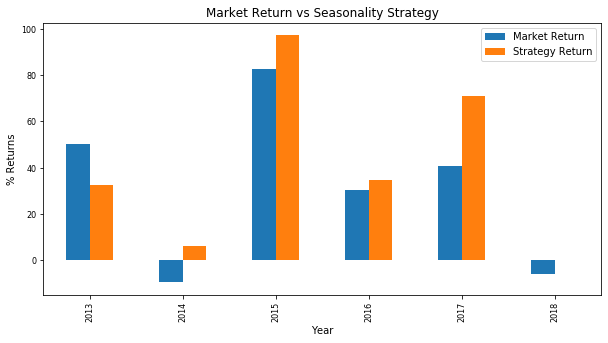

In [176]:
# AMZN Market Return vs Seasonality Strategy Analysis
Min_Month=AMZN_Seasonality.idxmin().dt.month
Max_Month=AMZN_Seasonality.idxmax().dt.month

Index=AMZNHistData.index
Years = list(set(Index.year))
Years.sort()

Returns = d = {'Market Return': pd.Series(index=Years),'Strategy Return': pd.Series(index=Years)}
Returns = pd.DataFrame(Returns)

for index, row in Returns.iterrows():
    Data=AMZNHistData[AMZNHistData.index.year == index]
    row['Market Return']=((Data.iloc[-1]-Data.iloc[0])*100/Data.iloc[0])
    if index<Years[-1]:
        # purchase at first day of min month (this year)
        Purchase=AMZNHistData[(AMZNHistData.index.year==index) & (AMZNHistData.index.month==Min_Month[0])].iloc[0]
        # sell at the first day of max month (next year)
        Sell=AMZNHistData[(AMZNHistData.index.year==index+1) & (AMZNHistData.index.month==Max_Month[0])].iloc[0]
        row['Strategy Return']=(Sell-Purchase)*100/Purchase

ax = Returns[['Market Return','Strategy Return']].plot(kind='bar', title ="Market Return vs Seasonality Strategy", 
                                                       figsize=(10, 5), legend=True, fontsize=8)
ax.set_xlabel("Year", fontsize=10)
ax.set_ylabel("% Returns", fontsize=10)
plt.show()


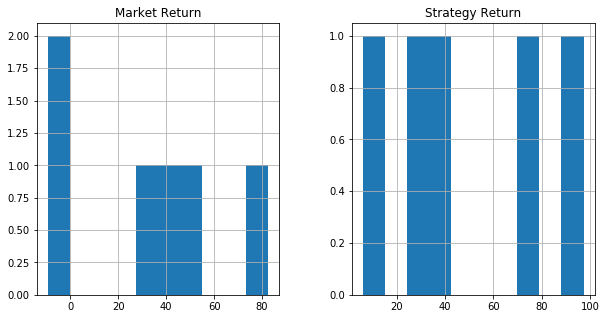

In [177]:
# Histgram for AMZN Market Return vs Seasonality Strategy Analysis
Returns.hist();


#### Observations/Comments:
* Simply test the return of a simple strategy based on seasonality. AMZN stock can be bought in December and sold the entire holdings in January or simply comparing return of AMZN stock from December of each year to January of next year.
* This strategy is not as profitable as simply buying and holding for entire year. This strategy is extremely simple without considering proper entry and exit point within each month. Therefore, in order to fully understand the profitability and risk of this strategy, in depth analysis is required which is outside the scope of this project.

<Figure size 720x360 with 0 Axes>

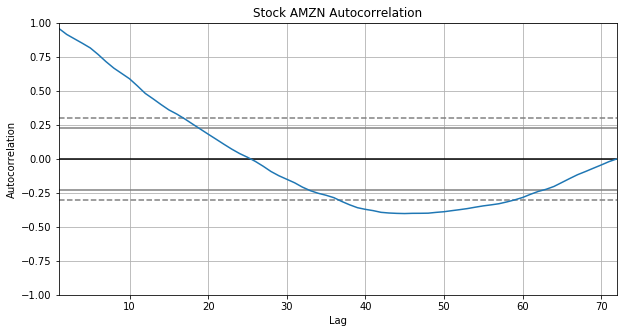

<Figure size 720x360 with 0 Axes>

In [185]:
# Autocorrelation Assessment for AMZN Stock Seasonality Analysis
plt.figure()
autocorrelation_plot(HistData_MonthEnd['AMZN'].dropna())
plt.title('Stock AMZN Autocorrelation')
plt.figure()


#### Observations/Comments:

* The python code plot is the autocorrelation of AMZN stock monthly data. Usually, autocorrelation coefficient is in the range [-1, 1], with 1 indicating perfect correlation and -1 inicating perfect anti-correlation.
* From the horizontal line for Lag, the first ten delayed copies (lags) can be considered to be correlated and the rest lags are more close to zero and have not been autocorrelated. 

#### Observations/Comments:

* The lag plot shows that lag 1 is autocorrelation, which means that the data with 1 month shift is correlated.
* This analysis is consistent with the seasonaility analysis above.

#### Observations/Comments:

* The lag plot shows that lag 2 is autocorrelation, which means that the data with 2 month shift is correlated.
* This analysis is consistent with the seasonaility analysis above.

Text(0.5, 1.0, 'A Lag Plot with 1 period of lag')

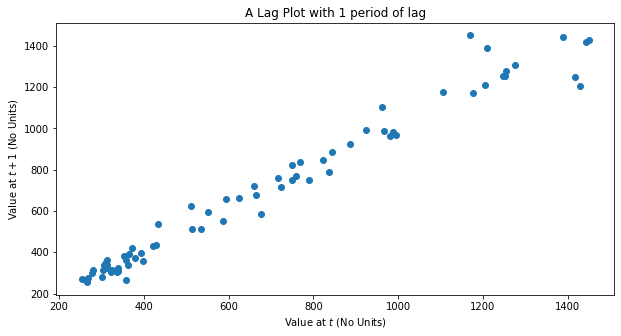

In [189]:
# Lag Plot Show for Lag 1
aLagPlot = pd.plotting.lag_plot(series=HistData_MonthEnd['AMZN'].dropna(), lag=1)
aLagPlot.set_ylabel("Value at ${t+1}$ (No Units)")
aLagPlot.set_xlabel("Value at $t$ (No Units)")
aLagPlot.set_title("A Lag Plot with 1 period of lag")


#### Observations/Comments:

* The lag plot shows that lag 1 is autocorrelation, which means that the data with 1 month shift is correlated.
* This analysis is consistent with the seasonaility analysis above.

Text(0.5, 1.0, 'A Lag Plot with 2 period of lag')

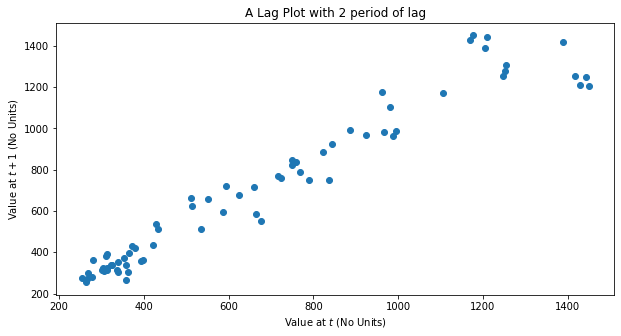

In [188]:
# Lag Plot Show for Lag 2
aLagPlot = pd.plotting.lag_plot(series=HistData_MonthEnd['AMZN'].dropna(), lag=2)
aLagPlot.set_ylabel("Value at ${t+1}$ (No Units)")
aLagPlot.set_xlabel("Value at $t$ (No Units)")
aLagPlot.set_title("A Lag Plot with 2 period of lag")


#### Observations/Comments:

* The lag plot shows that lag 2 is autocorrelation, which means that the data with 2 month shift is correlated.
* This analysis is consistent with the seasonaility analysis above.

---
# Part 4 - Coronavirus Effect on S&P 500 Stock Prices

#### Task 7:

Sixth question: Can we measure or see the coronavirus effect on S&P 500 stock prices?

Find the coronavirus start date from the "https://github.com/CSSEGISandData/COVID-19" source, prepare trend analysis or graphs and compare it with previous periods. (Jan- Now） ( Compare with previous year) 


### To be Filled:

* **Comments:**

* **Codes:**

* **Conclusion:**

---
# Part 5 - Stock Price Forecasting and Prediction

#### Task 8:

Some other predition model analysis?


### To be Filled:

* **Comments:**

* **Codes:**

* **Conclusion:**

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [191]:
################################################################
# Sector Industrials Return Forecast through K Nearest Neighbor (KNN) Approach

# Sector Industiral Stock Daily Return
SectorStockList = SectorDict["Industrials"]
x=DailyReturn[SectorStockList]
#x.head()


In [192]:
# Drop First NaN Row for Sector Industiral Stock Daily Return
x=x.drop(x.index[0])
#x.head()


In [581]:
# Check NaN Column for Sector Industiral Stock Daily Return
x.isnull().sum().unique()


array([  0,  12, 228], dtype=int64)

In [194]:
# Fullfill NaN Column with Column Mean for Sector Industiral Stock Daily Return
x=x.fillna(x.mean())
#x


In [195]:
# Re-Check NaN Column for Sector Industiral Stock Daily Return
x.isnull().sum().unique()


array([0], dtype=int64)

In [584]:
# Check Sector Industiral Stock Daily Return
x.tail()


ticker,AAL,ADP,ALK,ALLE,AME,AOS,ARNC,AVY,BA,CAT,...,TDG,TXT,UAL,UNP,UPS,URI,UTX,VRSK,WM,XYL
date,,,,,,,,,,,,,,,,,,,,,
2018-08-01,0.014202,0.038570,0.132648,0.016008,0.001618,0.009088,0.185657,0.033281,-0.109072,0.075742,...,-0.055050,0.007598,0.048195,0.081266,0.154231,-0.006510,0.006441,0.024395,0.077328,-0.032177
2018-09-01,-0.000959,0.006953,-0.020069,0.020803,-0.003770,-0.000790,0.001680,0.002614,0.026697,0.002409,...,0.023150,0.001714,-0.000438,0.011188,-0.000465,-0.000116,0.010917,-0.002784,-0.004089,0.000288
2018-10-01,0.032642,-0.009347,0.010661,-0.003979,-0.003784,0.002688,-0.000671,-0.002691,0.005747,-0.003365,...,-0.004178,-0.000855,0.067173,-0.009220,0.005267,0.004466,0.004692,-0.004032,-0.004790,-0.007194
2018-11-01,0.049089,-0.003995,0.038307,0.021550,0.011530,0.021132,0.020477,0.008264,0.024543,0.020076,...,0.022330,0.011815,0.046114,0.004653,0.028276,0.039203,0.000667,0.003425,0.010427,0.014058
2018-12-01,0.036335,0.011009,-0.017244,0.007822,0.008448,0.008803,0.014474,-0.001840,0.024656,0.006501,...,0.017356,0.017939,0.025507,0.005843,0.004721,0.005000,0.011779,0.008586,0.001021,0.007003


In [196]:
x.shape


(1258, 72)

In [197]:
x.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2013-01-04 to 2018-12-01
Data columns (total 72 columns):
AAL     1258 non-null float64
ADP     1258 non-null float64
ALK     1258 non-null float64
ALLE    1258 non-null float64
AME     1258 non-null float64
AOS     1258 non-null float64
ARNC    1258 non-null float64
AVY     1258 non-null float64
BA      1258 non-null float64
CAT     1258 non-null float64
CHRW    1258 non-null float64
CMI     1258 non-null float64
COL     1258 non-null float64
CSX     1258 non-null float64
CTAS    1258 non-null float64
DAL     1258 non-null float64
DE      1258 non-null float64
DOV     1258 non-null float64
EFX     1258 non-null float64
EMR     1258 non-null float64
ETN     1258 non-null float64
EXPD    1258 non-null float64
FAST    1258 non-null float64
FDX     1258 non-null float64
FIS     1258 non-null float64
FISV    1258 non-null float64
FLR     1258 non-null float64
FLS     1258 non-null float64
GD      1258 non-null float64
GE   

In [205]:
# Sector Industiral Daily Return
y=pd.DataFrame(DailySectorReturn['Industrials'])
#y.head()


In [206]:
# Check Sector Industiral Daily Return
y.tail()


,Industrials
date,
2018-08-01,0.031114
2018-09-01,0.002963
2018-10-01,-0.001155
2018-11-01,0.014308
2018-12-01,0.007596


In [207]:
y.shape


(1258, 1)

In [208]:
y.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2013-01-04 to 2018-12-01
Data columns (total 1 columns):
Industrials    1258 non-null float64
dtypes: float64(1)
memory usage: 59.7 KB


In [209]:
# Target Variable for Sector Industiral Daily Return
y = np.where(y>0,1,-1)
y


array([[ 1],
       [-1],
       [ 1],
       ...,
       [-1],
       [ 1],
       [ 1]])

In [212]:
# KNN Approach Fitting
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [213]:
# Predicting by the trained (fitted) model
y_hat=knn.predict(x)
y_hat


array([ 1, -1,  1, ..., -1,  1,  1])

In [215]:
# Accuracy Check
accuracy_score(y_hat,y)


0.9753577106518283

In [216]:
# Define Train and Test Data Sets for Sector Industiral Daily Return
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.1,random_state=42)


In [ ]:
# KNN Approach Fitting for Train Data
knn.fit(x_train,y_train)


In [217]:
# Predicting by the trained (fitted) model
y_hat=knn.predict(x_test)


In [218]:
y_hat


array([ 1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1,
        1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,
        1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
        1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1,
        1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1])

In [220]:
#y_test


In [221]:
# Compare predicted classes and test of Y
print('Result of y_test == y_hat = \n', y_test == y_hat)


Result of y_test == y_hat = 
 [[ True False False ...  True False  True]
 [False  True  True ... False  True False]
 [False  True  True ... False  True False]
 ...
 [ True False False ...  True False  True]
 [False  True  True ... False  True False]
 [ True False False ...  True False  True]]


In [222]:
# Accuracy score
accuracy_score(y_test,y_hat)


0.9761904761904762

---
# Part 6 - Conclusion

### To be Filled:

* **Conclusion:**

## References

### To be Filled:

* **References:**